In [91]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luisfetoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

In [93]:
data_train, data_test = train_test_split(data, test_size=0.2)
x_train, x_test = data_train["Review"], data_test["Review"]
y_train, y_test = data_train["Class"], data_test["Class"]

In [94]:
class limpieza:

    def solo_letras(self, texto):
        abc = "abcdefghijklmnñopqrstuvwxyz"
        new_texto = ""
        for i in range(len(texto)):
            if texto[i] not in abc:
                new_texto += " "
            else:
                new_texto += texto[i]
        return new_texto

    def limpiar(self):
        self.data = self.data.str.lower()
        self.data = self.data.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u")
        self.data = self.data.apply(lambda x: self.solo_letras(x))
        return self.data
    
    def stopwords(self):
        stop = stopwords.words("spanish")
        self.data = self.data.apply(lambda x: " ".join([item for item in x.split() if item not in stop]))
        return self.data

    def stem(self):
        stemmer = nltk.SnowballStemmer("spanish")
        self.data = self.data.apply(lambda x: " ".join([stemmer.stem(item) for item in x.split()]))
        return self.data
    
    def fit(self, data, y=None):
        self.data = data
        self.limpiar()
        self.stem()
        self.stopwords()
        return self
    
    def transform(self, data):
        self.data = data
        self.limpiar()
        self.stem()
        self.stopwords()
        return self.data


In [95]:
pipeline = make_pipeline(
    limpieza(),
    TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, ngram_range=(1, 3)),
    LogisticRegression(max_iter=1000)
)

Fitting...
Fitted! (22.25s)

Predicting...
Predicted! (2.56s)

Exactitud:  0.498
Precisión:  0.493
Recall:  0.498
F1:  0.487


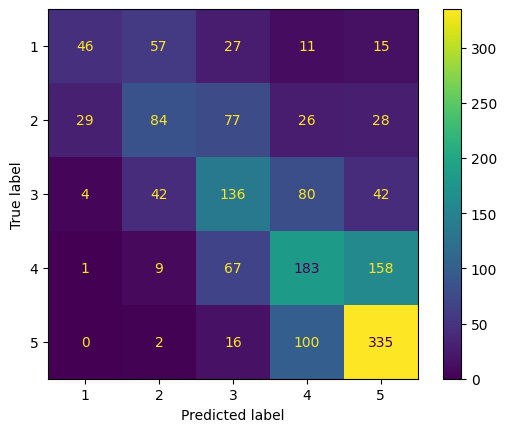

In [96]:
import time
print("Fitting...")
t = time.time()
pipeline.fit(x_train, y_train)
print(f"Fitted! ({round(time.time()-t, 2)}s)")
print()
print("Predicting...")
t = time.time()
pred = pipeline.predict(x_test)
print(f"Predicted! ({round(time.time()-t, 2)}s)")
print()
print("Exactitud: ", round(accuracy_score(y_test, pred), 3))
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 3))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 3))
print("F1: ", round(f1_score(y_test, pred, average='weighted'), 3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

plt.show()

In [99]:
test = pd.Series(["horrible", "muy bueno", "malo", "excelente", "pésimo", "muy malo"])

result = pipeline.predict(test)
score = pipeline.predict_proba(test)

for i in range(len(test)):
    print(test[i], ":", result[i], "("+str(round(score[i][result[i]-1]*100,2))+"%)")


horrible : 1 (68.51%)
muy bueno : 4 (85.96%)
malo : 2 (56.64%)
excelente : 5 (98.12%)
pésimo : 1 (94.42%)
muy malo : 2 (56.64%)


In [100]:
pipeline.predict_proba(test)

array([[6.85146932e-01, 8.71046424e-02, 7.58663395e-02, 6.35566929e-02,
        8.83253936e-02],
       [8.40519261e-04, 3.97749490e-03, 8.50765547e-02, 8.59622162e-01,
        5.04832691e-02],
       [3.75726807e-01, 5.66393077e-01, 5.18871470e-02, 4.78050396e-03,
        1.21246493e-03],
       [2.37395126e-04, 3.13168188e-04, 6.63739386e-04, 1.75666638e-02,
        9.81219033e-01],
       [9.44177440e-01, 3.20851867e-02, 1.08237766e-02, 6.09515286e-03,
        6.81844408e-03],
       [3.75726807e-01, 5.66393077e-01, 5.18871470e-02, 4.78050396e-03,
        1.21246493e-03]])